In [1]:
import pandas as pd

In [8]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("datasets_228_482_diabetes.csv", header=None,skiprows=1, names=col_names)

In [9]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [16]:
pima.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pregnant  768 non-null    int64  
 1   glucose   768 non-null    int64  
 2   bp        768 non-null    int64  
 3   skin      768 non-null    int64  
 4   insulin   768 non-null    int64  
 5   bmi       768 non-null    float64
 6   pedigree  768 non-null    float64
 7   age       768 non-null    int64  
 8   label     768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [41]:
logreg = LogisticRegression(max_iter= 500)
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)

In [43]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[118,  12],
       [ 26,  36]], dtype=int64)

In [44]:
pd.DataFrame(cnf_matrix)

,0,1
0,118,12
1,26,36


In [25]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.91      0.86       130
           1       0.75      0.58      0.65        62

    accuracy                           0.80       192
   macro avg       0.78      0.74      0.76       192
weighted avg       0.80      0.80      0.79       192



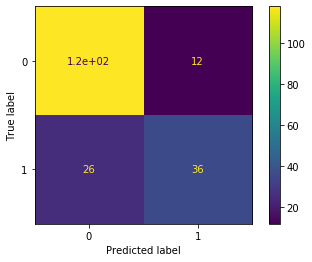

In [45]:
metrics.plot_confusion_matrix(logreg,X_test,y_test)

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

,0,1
0,118,12
1,26,36


Text(0.5, 257.44, 'Predicted label')

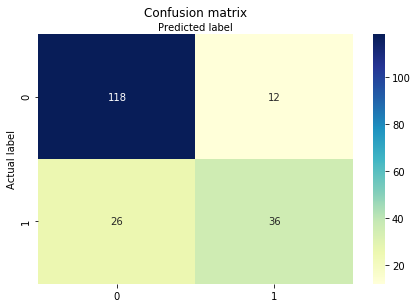

In [30]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### ROC 

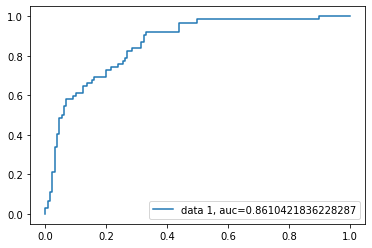

In [60]:
# pick minority feature and you can do 1 to all
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [54]:
X_test.shape

(192, 7)

In [55]:
y_test.shape

(192,)

In [62]:
y_pred_proba

array([0.95104786, 0.16263467, 0.0984264 , 0.63002799, 0.12185942,
       0.03785251, 0.73379967, 0.84907632, 0.38571259, 0.38231112,
       0.56893842, 0.96088654, 0.29025542, 0.16698294, 0.12067219,
       0.1505483 , 0.84282587, 0.02497091, 0.40781957, 0.23890289,
       0.64441883, 0.44462154, 0.17537931, 0.06639331, 0.05174362,
       0.33004859, 0.04584589, 0.90537435, 0.10195056, 0.14253186,
       0.45083676, 0.23511757, 0.10166321, 0.4301719 , 0.09304273,
       0.70594352, 0.44026497, 0.08718967, 0.29236507, 0.71988534,
       0.28267712, 0.23949253, 0.150872  , 0.80077235, 0.7641231 ,
       0.00724903, 0.07631448, 0.189832  , 0.32909281, 0.31017472,
       0.39445531, 0.17565306, 0.87427495, 0.4638662 , 0.14872369,
       0.00263713, 0.05657334, 0.60541353, 0.27506074, 0.05149417,
       0.73360506, 0.48980882, 0.10717433, 0.67988578, 0.68006764,
       0.89622973, 0.72159082, 0.144336  , 0.35241197, 0.10771322,
       0.1261549 , 0.35003711, 0.09456265, 0.95422506, 0.85288

In [63]:
logreg.predict_proba(X_test)

array([[0.04895214, 0.95104786],
       [0.83736533, 0.16263467],
       [0.9015736 , 0.0984264 ],
       [0.36997201, 0.63002799],
       [0.87814058, 0.12185942],
       [0.96214749, 0.03785251],
       [0.26620033, 0.73379967],
       [0.15092368, 0.84907632],
       [0.61428741, 0.38571259],
       [0.61768888, 0.38231112],
       [0.43106158, 0.56893842],
       [0.03911346, 0.96088654],
       [0.70974458, 0.29025542],
       [0.83301706, 0.16698294],
       [0.87932781, 0.12067219],
       [0.8494517 , 0.1505483 ],
       [0.15717413, 0.84282587],
       [0.97502909, 0.02497091],
       [0.59218043, 0.40781957],
       [0.76109711, 0.23890289],
       [0.35558117, 0.64441883],
       [0.55537846, 0.44462154],
       [0.82462069, 0.17537931],
       [0.93360669, 0.06639331],
       [0.94825638, 0.05174362],
       [0.66995141, 0.33004859],
       [0.95415411, 0.04584589],
       [0.09462565, 0.90537435],
       [0.89804944, 0.10195056],
       [0.85746814, 0.14253186],
       [0.

In [61]:
# logreg.predict_proba(X_test)